In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [48]:
df = load_breast_cancer()


In [49]:
x = df.data
y = df.target


C:\Users\Dell\AppData\Local\Temp\ipykernel_3328\386653734.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


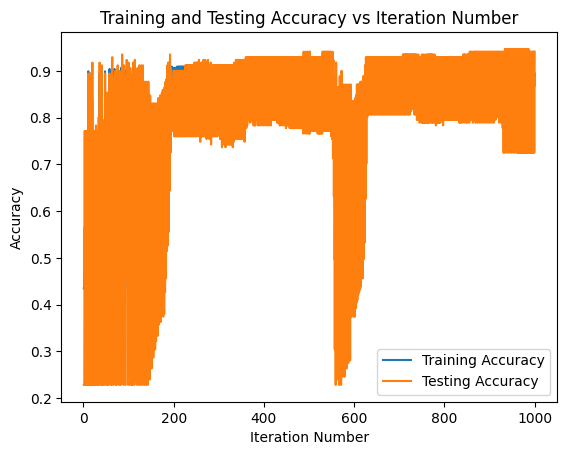

In [60]:
split_ratio = 0.7
split_index = int(split_ratio * len(x))

x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

np.random.seed(0)
weights = np.random.randn(x_train.shape[1])
bias = np.random.randn()

learning_rate = 0.01
iterations = 1000

def train_logistic_regression(x, y, weights, bias, learning_rate, iterations):
    m = len(y)
    training_accuracy = []
    testing_accuracy = []
    for i in range(iterations):
        
        z = np.dot(x, weights) + bias
        y_pred = sigmoid(z)
            
        error = y_pred - y
        gradient_weights = np.dot(x.T, error) / m
        gradient_bias = np.sum(error) / m
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        
        y_train_pred = (sigmoid(np.dot(x_train, weights) + bias) > 0.5).astype(int)
        y_test_pred = (sigmoid(np.dot(x_test, weights) + bias) > 0.5).astype(int)
        training_accuracy.append(np.mean(y_train_pred == y_train))
        testing_accuracy.append(np.mean(y_test_pred == y_test))

    return weights, bias, training_accuracy, testing_accuracy

trained_weights, trained_bias, training_accuracy, testing_accuracy = train_logistic_regression(x_train, y_train, weights, bias, learning_rate, iterations)

plt.plot(range(1, iterations + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, iterations + 1), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Iteration Number')
plt.legend()
plt.show()

In [57]:
y_pred_test = (sigmoid(np.dot(x_test, trained_weights) + trained_bias) > 0.5).astype(int)

confusion_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    confusion_matrix[y_test[i]][y_pred_test[i]] += 1

true_positive = confusion_matrix[1][1]
false_positive = confusion_matrix[0][1]
true_negative = confusion_matrix[0][0]
false_negative = confusion_matrix[1][0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Confusion Matrix:")
print(confusion_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confusion Matrix:
[[ 31.   8.]
 [  2. 130.]]
Sensitivity: 0.9848484848484849
Specificity: 0.7948717948717948


C:\Users\Dell\AppData\Local\Temp\ipykernel_3328\1687678985.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
